# K Means Clustering Project

## From Pierian Data's Python for Data Science and Machine Learning Boot Camp

**Project goal:** Predict whether a school is public or private using unsupervised learning.

The data set contains the following 18 variables:
* Private: A factor with levels No and Yes indicating private or public university
* Apps: Number of applications received
* Accept: Number of applications accepted
* Enroll: Number of new students enrolled
* Top10perc: Pct. new students from top 10% of H.S. class
* Top25perc: Pct. new students from top 25% of H.S. class
* F.Undergrad: Number of fulltime undergraduates
* P.Undergrad: Number of parttime undergraduates
* Outstate: Out-of-state tuition
* Room.Board: Room and board costs
* Books: Estimated book costs
* Personal: Estimated personal spending
* PhD: Pct. of faculty with Ph.D.’s
* Terminal: Pct. of faculty with terminal degree
* S.F.Ratio: Student/faculty ratio
* perc.alumni: Pct. alumni who donate
* Expend: Instructional expenditure per student
* Grad.Rate: Graduation rate

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Load and inspect data

In [3]:
data = pd.read_csv('./data/College_Data')

In [4]:
print(data.info())
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


The data set contains as its first two columns the school name and whether or not it was private. These will be ignored for the implementation of unsupervised learning but the 'Private' column will be used to test model performance afterwards. The remaining columns are numeric, allowing for direct implementation of a K means clustering model. There are no missing values.

## Brief data exploration

In [14]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


Order of magnitudes on all variables seem reasonable. For example, new enrollment rates range from order 100 to 1000 (spanning small to large schools), book expenditures also span hundreds to thousands of dollars. Columns that are percentages max at or under 100 % except for the 'Grad.Rate' column, which maxes out at 118%. Since graduate rate is not defined well in the project header, we are not sure what this reflects (e.g. error, or something to do with transfer students?).

Determine how many schools have > 100% graduation rate:

In [78]:
data.loc[data['Grad.Rate']>100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


Since it is just the one school and since the other entries in the row look reasonable, do a quick fix and replace 118 % with 100 %:

In [79]:
data.loc[data['Grad.Rate']>100, 'Grad.Rate'] = 100

The following three plots are brief plausibility checks:

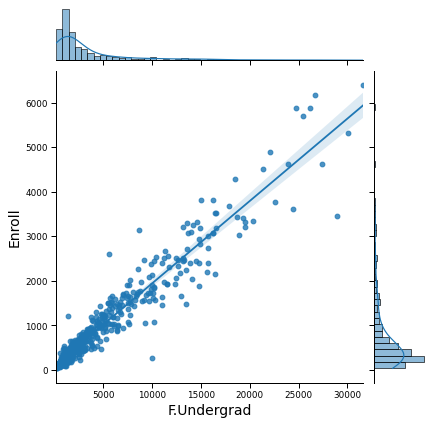

In [80]:
sns.set_context("paper", rc={"axes.labelsize":14})
sns.jointplot(data=data, x='F.Undergrad', y='Enroll', kind='reg')

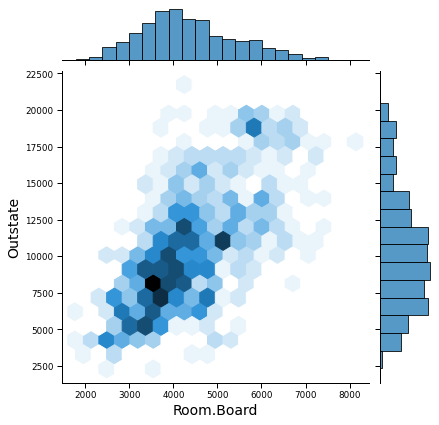

In [81]:
sns.jointplot(x=data['Room.Board'], y=data['Outstate'], kind='hex')

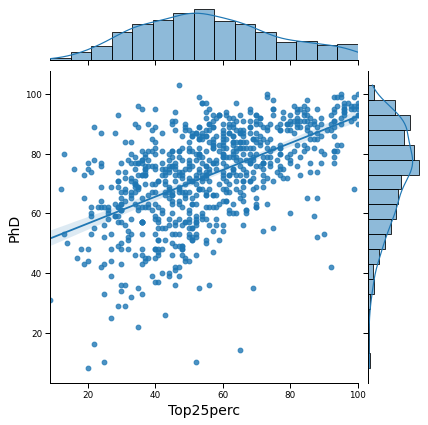

In [82]:
sns.jointplot(data=data, x='Top25perc', y='PhD', kind='reg')

Summarizing the above three plots:

(1) There is a strong relationship between new enrollment levels and the number of full time undergraduates. This makes sense, as larger schools will have more of both. 

(2) There is a positive relationship between out of state tuition vs. room and board, which is reasonable since more expensive schools may be expected to have higher costs for both.

(3) The third plot need not be true, but it is reasonable to guess that on average, schools with a higher percent of PhD faculty might be 'better' universities attracting students that did well in high school.

## K means clustering model

### Model training

In [83]:
from sklearn.cluster import KMeans

We are trying to cluster data by public vs. private schools and therefore only need two clusters for the model:

In [84]:
km = KMeans(n_clusters=2)
km.fit(data.drop(['Unnamed: 0', 'Private'], axis=1))

KMeans(n_clusters=2)

### Testing results as if there were no target data

Split the data set rows by the two groups determined with the model:

In [117]:
kmc1 = data.loc[km.labels_.astype(bool)]
kmc2 = data.loc[~km.labels_.astype(bool)]

Many public universities are larger than private ones and therefore we would expect some splitting of the two clusters by number of full time undergraduates and the number of applications:

Text(0, 0.5, '# of applications')

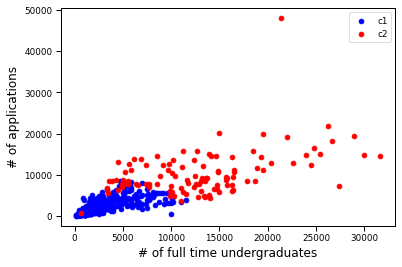

In [128]:
plt.figure()
plt.scatter(kmc1['F.Undergrad'], kmc1['Apps'], c='blue', label='c1')
plt.scatter(kmc2['F.Undergrad'], kmc2['Apps'], c='red', label='c2')
plt.legend()
plt.xlabel('# of full time undergraduates', fontsize=12)
plt.ylabel('# of applications', fontsize=12)

**So it seems likely that cluster 1 is the private universities and cluster 2 is the public universities.**

Less obvious than the number of students but a reasonable guess is that there may differences in personal spending and percent of alumni who donate:

Average perc.alumni
c1: 23
c2: 20
Average Personal
c1: 1280
c2: 1714


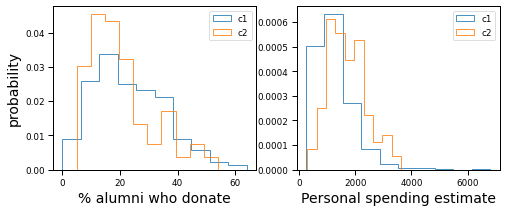

In [135]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.hist(kmc1['perc.alumni'], histtype='step', bins=10, density=True, label='c1')
plt.hist(kmc2['perc.alumni'], histtype='step', bins=10, density=True, label='c2')
plt.legend()
plt.xlabel("% alumni who donate")
plt.ylabel("probability")

plt.subplot(1,2,2)
plt.hist(kmc1['Personal'], histtype='step', bins=10, density=True, label='c1')
plt.hist(kmc2['Personal'], histtype='step', bins=10, density=True, label='c2')
plt.legend()
plt.xlabel("Personal spending estimate")

print("Average perc.alumni")
print("c1: %i" % kmc1['perc.alumni'].mean())
print("c2: %i" % kmc2['perc.alumni'].mean())

print("Average Personal")
print("c1: %i" % kmc1['Personal'].mean())
print("c2: %i" % kmc2['Personal'].mean())

There is small to negligible difference in the percent of alumni who donate, but a sizable difference in personal spending (about 30 %). The cluster with the higher spending is the one assumed to be public universities from the F.Undergrad and Apps variables.

### Testing results with the target data

In [140]:
from sklearn.metrics import confusion_matrix, classification_report

In [148]:
labels_true = pd.get_dummies(data, columns=['Private'], drop_first=True)['Private_Yes']

In [151]:
print(confusion_matrix(labels_true, km.labels_))
print(classification_report(labels_true, km.labels_))

[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



There are about 3x the amount of private universities and public universities in this data set, so it is not surprising that the model performs better at classifying the private universities. Overall the model scores a 65 - 75 % (non-weighted) average in all performance metrics, which is fair.  